In [1]:
import numpy as np
from TMDP import TMDP
from River_swim import River

from algorithms import *
from model_functions import *

import matplotlib.pyplot as plt


#np.set_printoptions(precision=4)
import math
from utils import *

nS = 8
nA = 2
seed = 2184109
gamma = .9
mu = np.ones(nS) * 1/nS
river = River(nS, mu, gamma=gamma, small=5, large=1000, seed=seed)
tau = 0.3
xi = np.ones(nS) * 1/nS
tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)
mdp = TMDP(river, xi, tau=0., gamma=gamma, seed=seed)


In [2]:
r_s_a = compute_r_s_a(tmdp.P_mat_tau, tmdp.reward)
r_s_a_xi = compute_r_s_a(tmdp.xi, tmdp.reward)
r_s_a_p = compute_r_s_a(tmdp.P_mat, tmdp.reward)

Q_star, _ = bellman_optimal_q(tmdp.P_mat_tau, tmdp.reward, gamma).values()
pi = get_policy(Q_star)
pi_prime = np.array([[0., 1.] for i in range(nS)])
d = compute_d(mu, tmdp.P_mat_tau, pi, tmdp.gamma)
V_star = get_value_function(Q_star)
print(tmdp.P_mat.shape)
print(Q_star)

Q_star_0 , _ = bellman_optimal_q(tmdp.P_mat, tmdp.reward, gamma).values()
print(Q_star_0)

(8, 2, 8)
[[197.33860226 192.95416508]
 [193.65110261 191.12121965]
 [191.32797784 189.99387525]
 [189.86440925 191.23860869]
 [189.8081067  198.77761403]
 [194.55768008 223.6183101 ]
 [210.20731862 302.85617042]
 [260.12717063 555.34815579]]
[[ 68.0544467   70.06049679]
 [ 63.05444711  96.0088304 ]
 [ 86.40794736 140.21710219]
 [126.19539197 206.88545394]
 [186.19690854 305.73248103]
 [275.15923293 451.91574319]
 [406.72416887 668.01969924]
 [601.21772931 987.46905542]]


In [3]:
print(r_s_a_p)
print(r_s_a_xi)
print(r_s_a)

             

[[  5.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0. 300.]]
[[  0.625   0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.    125.   ]]
[[  3.6875   0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.     247.5   ]]


In [4]:
status_step = 40000
episodes = 1000000
q_p = get_q_hat( tmdp.P_mat, r_s_a_p, tmdp.gamma, Q_star)
q_xi = get_q_hat(tmdp.xi, r_s_a_xi, tmdp.gamma, Q_star)

print("Q_hat_P:\n", q_p)
print("Q_hat_xi:\n",q_xi)
print("Rebuilted Q:\n", (1-tmdp.tau) * q_p + tmdp.tau * q_xi)
print("Q:\n", Q_star)

Q_hat_P:
 [[182.60474204 176.60911713]
 [177.60474204 173.99062363]
 [174.28599234 172.38013161]
 [172.19518005 174.15832249]
 [172.11474782 184.92833009]
 [178.89985263 220.41503873]
 [201.25647909 333.611982  ]
 [272.57055338 640.74338943]]
Q_hat_xi:
 [[231.71761095 231.09261095]
 [231.09261095 231.09261095]
 [231.09261095 231.09261095]
 [231.09261095 231.09261095]
 [231.09261095 231.09261095]
 [231.09261095 231.09261095]
 [231.09261095 231.09261095]
 [231.09261095 356.09261095]]
Rebuilted Q:
 [[197.33860271 192.95416527]
 [193.65110271 191.12121982]
 [191.32797792 189.99387541]
 [189.86440932 191.23860902]
 [189.80810676 198.77761434]
 [194.55768012 223.6183104 ]
 [210.20731865 302.85617068]
 [260.12717065 555.34815588]]
Q:
 [[197.33860226 192.95416508]
 [193.65110261 191.12121965]
 [191.32797784 189.99387525]
 [189.86440925 191.23860869]
 [189.8081067  198.77761403]
 [194.55768008 223.6183101 ]
 [210.20731862 302.85617042]
 [260.12717063 555.34815579]]


In [5]:
Q = np.zeros((nS, nA))
Qs = Q_learning(tmdp, Q, alpha=1., episodes=episodes, status_step=status_step)

In [6]:
Q_0 = np.zeros((nS, nA))
Qs_0 = Q_learning(mdp, Q_0, alpha=1., episodes=episodes, status_step=status_step, state_distribution=d)

In [7]:
print(get_policy(Qs["Qs"][-1]))
print(get_policy(Q_star))

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
Q = Qs["Qs"][-1]
print(Q)

q_p = get_q_hat( tmdp.P_mat, r_s_a_p, tmdp.gamma, Q)
q_xi = get_q_hat(tmdp.xi, r_s_a_xi, tmdp.gamma, Q)

print("Q_hat_P:\n", q_p)
print("Q_hat_xi:\n",q_xi)
print("Rebuilted Q:\n", (1-tmdp.tau) * q_p + tmdp.tau * q_xi)
print("Q:\n", Q)

[[212.75063315 137.99447732]
 [208.49355533 140.13626816]
 [144.22013688 188.39981936]
 [190.57336455 144.19111594]
 [193.57497477 150.17980668]
 [156.98950542 229.0813682 ]
 [205.47678477 299.44174294]
 [283.55437393 555.52818352]]
Q_hat_P:
 [[196.47556983 190.32615882]
 [191.47556983 182.60202809]
 [187.6441998  171.95513086]
 [169.55983743 172.13084379]
 [171.51602809 183.5340586 ]
 [174.2174773  221.97495715]
 [206.17323138 332.30847387]
 [269.49756864 638.6409076 ]]
Q_hat_xi:
 [[234.3824097 233.7574097]
 [233.7574097 233.7574097]
 [233.7574097 233.7574097]
 [233.7574097 233.7574097]
 [233.7574097 233.7574097]
 [233.7574097 233.7574097]
 [233.7574097 233.7574097]
 [233.7574097 358.7574097]]
Rebuilted Q:
 [[207.84762179 203.35553409]
 [204.16012179 197.94864257]
 [201.47816277 190.49581452]
 [188.81910911 190.61881356]
 [190.18844258 198.60106393]
 [192.07945702 225.50969292]
 [214.44848488 302.74315462]
 [258.77552096 554.67585823]]
Q:
 [[212.75063315 137.99447732]
 [208.49355533 1

In [9]:
print(Qs["Qs"][-1])
print(Qs_0["Qs"][-1])
visits = Qs["visits"]
print(visits)
visit_dist = visits / np.sum(visits)
print(visit_dist)
print(d)

[[212.75063315 137.99447732]
 [208.49355533 140.13626816]
 [144.22013688 188.39981936]
 [190.57336455 144.19111594]
 [193.57497477 150.17980668]
 [156.98950542 229.0813682 ]
 [205.47678477 299.44174294]
 [283.55437393 555.52818352]]
[[ 65.03441805  73.39391768]
 [ 63.44262285  96.41146701]
 [ 95.26225595 135.9184755 ]
 [140.70250671 191.52698248]
 [208.95158129 292.98226487]
 [287.60279565 453.72266724]
 [418.26209938 658.795587  ]
 [652.83325888 955.30381075]]
[130524. 140249. 144308. 134826. 126226. 125769. 134566.  63540.]
[0.13052296 0.14024788 0.14430685 0.13482492 0.12622499 0.12576799
 0.13456492 0.06353949]
[0.2591634  0.07879438 0.05165775 0.08583725 0.11334557 0.12742383
 0.18389381 0.09988401]


In [10]:
visit_weights = 1.0 / (d + 1e-8)
visit_weights = visit_weights / np.sum(visit_weights)
print(visit_weights)

[0.0484271  0.15928206 0.24295544 0.14621311 0.11072804 0.09849439
 0.0682488  0.12565106]


In [11]:
tau_prime = 0.
metrics = compute_metrics(tmdp, Qs["Qs"], Q_star, Qs["visit_distributions"], tau_prime=tau_prime)
metrics_0 = compute_metrics(mdp, Qs_0["Qs"], Q_star_0, Qs_0["visit_distributions"], tau_prime=tau_prime)
print(metrics)
print(metrics_0)

{'J': [35.595799375000006, 51.36986301369861, 51.36986301369859, 341.50658321909754, 51.36986301369864, 165.20820760410382, 165.20820760410382, 51.36986301369859, 51.36986301369858, 0.0, 246.48188362430128, 246.48188362430128, 165.20820760410382, 51.36986301369861, 259.88149425432823, 165.20820760410382, 70.11234332645927, 310.05861698072135, 191.54866190494732, 51.36986301369864, 51.36986301369864, 197.21930593693423, 268.2465386914597, 273.8943101200351, 316.06060621667064, 265.51698800021546, 340.6844168677573], 'J_tau': [12.148623500089025, 141.14519112207148, 141.14519112207145, 247.77262568187544, 141.1451911220715, 220.45998449273677, 220.45998449273677, 141.14519112207145, 141.1451911220714, 0.0, 239.70514708584065, 239.70514708584065, 220.45998449273665, 141.14519112207148, 245.33353865179004, 220.45998449273662, 150.70449308097363, 253.56143173191762, 231.20765829857567, 141.1451911220715, 141.1451911220715, 232.2245376864039, 249.4394621009693, 251.0172264953337, 256.0592008

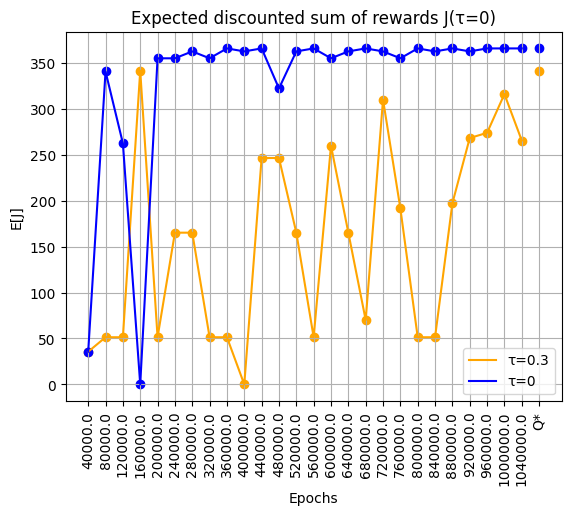

In [12]:
x = np.array([])
y_0 = np.array([])
y = np.array([])

for i, J in enumerate(metrics["J"]):
    y = np.append(y, J)
    y_0 = np.append(y_0, metrics_0["J"][i])
    if i < len(metrics["J"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange")
plt.scatter(x, y_0, c="blue")

plt.plot(x[:-1], y[:-1], c="orange", label="τ={}".format(tmdp.tau))
plt.plot(x[:-1], y_0[:-1], c="blue", label="τ=0")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("E[J]")
plt.title("Expected discounted sum of rewards J(τ=0)")
plt.grid(visible=True)


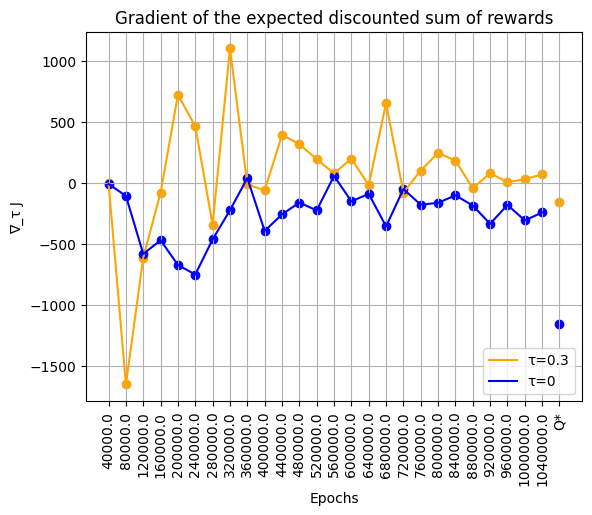

In [13]:
x = np.array([])
y_0 = np.array([])
y = np.array([])

for i, J in enumerate(metrics["grad_J"]):
    y = np.append(y, J)
    y_0 = np.append(y_0, metrics_0["grad_J"][i])
    if i < len(metrics["grad_J"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange")
plt.scatter(x, y_0, c="blue")

plt.plot(x[:-1], y[:-1], c="orange", label="τ={}".format(tmdp.tau))
plt.plot(x[:-1], y_0[:-1], c="blue", label="τ=0")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("∇_τ J")
plt.title("Gradient of the expected discounted sum of rewards")
plt.grid(visible=True)


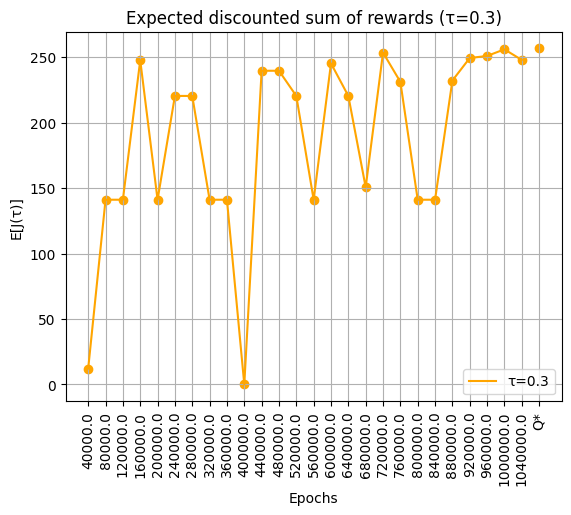

In [14]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["J_tau"]):
    y = np.append(y, J)
    if i < len(metrics["J_tau"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.xticks(x_map, x)
plt.scatter(x, y, c="orange")

plt.plot(x[:-1], y[:-1], c="orange", label="τ={}".format(tmdp.tau))
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("E[J(τ)]")
plt.title("Expected discounted sum of rewards (τ={})".format(tmdp.tau))
plt.grid(visible=True)

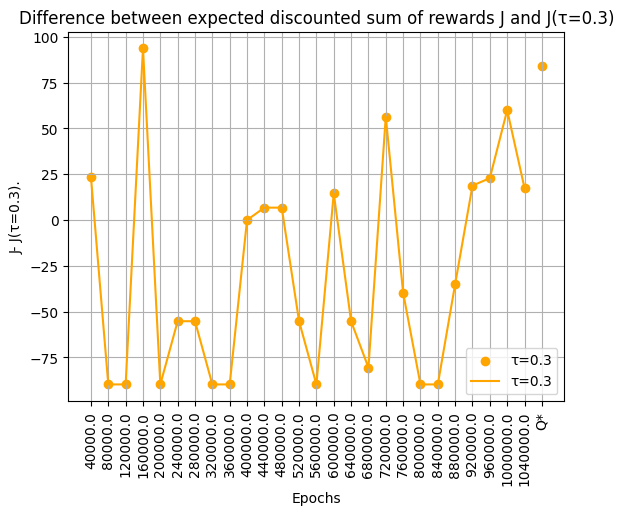

In [15]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["delta_J"]):
    y = np.append(y, J)
    if i < len(metrics["delta_J"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.xticks(x_map, x)
plt.scatter(x, y, c="orange", label="τ={}".format(tmdp.tau))
plt.plot(x[:-1], y[:-1], c="orange", label="τ={}".format(tmdp.tau))
plt.xlabel("Epochs")
plt.legend(loc="lower right")
plt.xticks(rotation=90)
plt.ylabel("J- J(τ={}).".format(tmdp.tau))
plt.title("Difference between expected discounted sum of rewards J and J(τ={})".format(tmdp.tau))
plt.grid(visible=True)

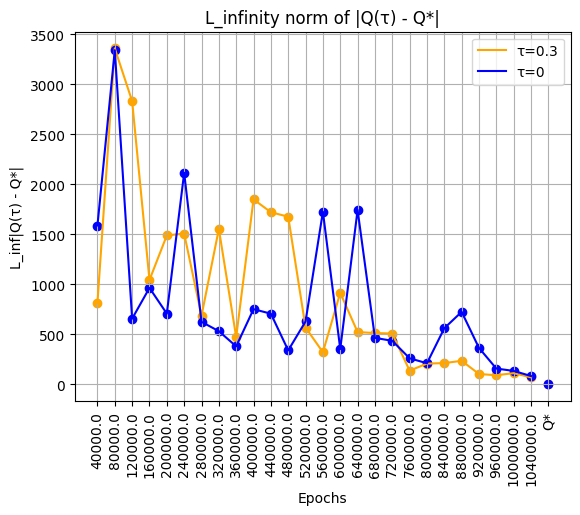

In [16]:
x = np.array([])
y = np.array([])
y_0 = np.array([])
for i, J in enumerate(metrics["delta_Q"]):
    y = np.append(y, J)
    y_0 = np.append(y_0, metrics_0["delta_Q"][i])
    if i < len(metrics["delta_Q"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange")
plt.scatter(x, y_0, c="blue")

plt.plot(x[:-1], y[:-1], c="orange", label="τ={}".format(tmdp.tau))
plt.plot(x[:-1], y_0[:-1], c="blue", label="τ=0")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("L_inf|Q(τ) - Q*|")
plt.title("L_infinity norm of |Q(τ) - Q*|")
plt.grid(visible=True)

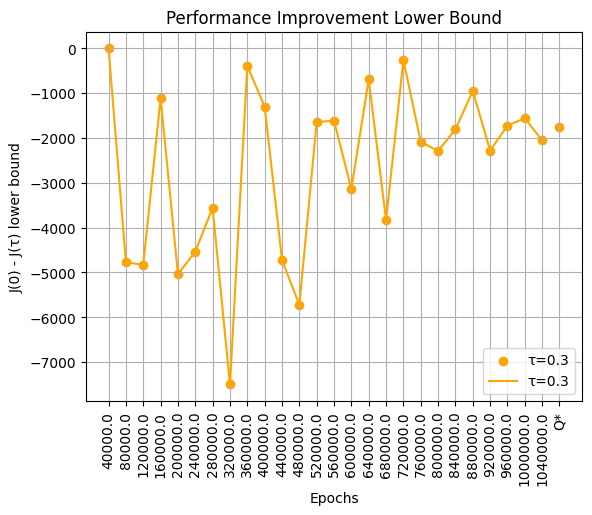

In [17]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["l_bounds"]):
    y = np.append(y, J)
    if i < len(metrics["l_bounds"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange", label="τ={}".format(tmdp.tau))
plt.plot(x[:-1], y[:-1], c="orange", label="τ={}".format(tmdp.tau))
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("J(0) - J(τ) lower bound")
plt.title("Performance Improvement Lower Bound")
plt.grid(visible=True)

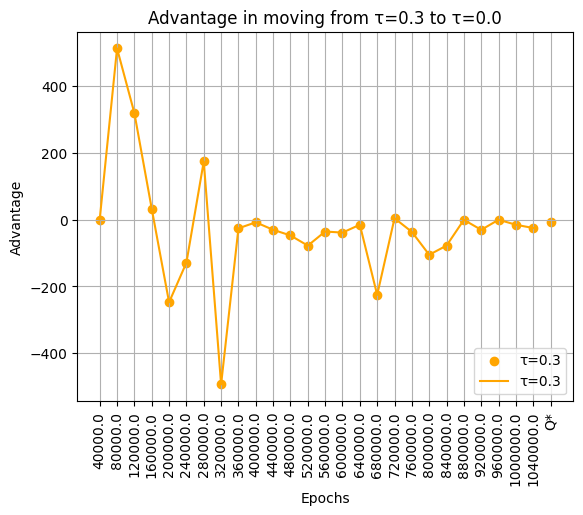

In [18]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["adv_terms"]):
    y = np.append(y, J)
    if i < len(metrics["adv_terms"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange", label="τ={}".format(tmdp.tau))
plt.plot(x[:-1], y[:-1], c="orange", label="τ={}".format(tmdp.tau))
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("Advantage")
plt.title("Advantage in moving from τ={} to τ={}".format(tmdp.tau, tau_prime))
plt.grid(visible=True)

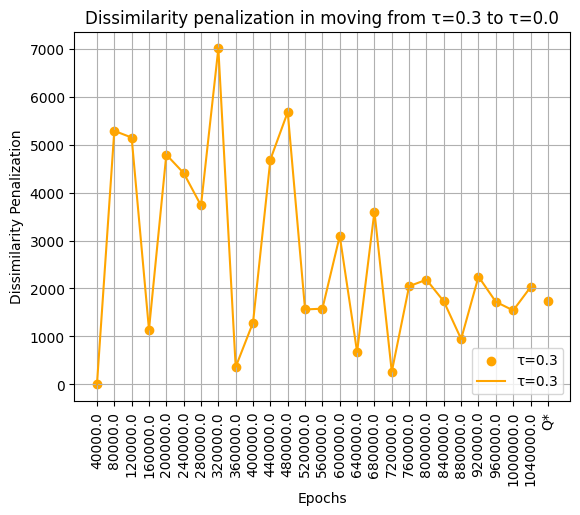

In [19]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["diss_terms"]):
    y = np.append(y, J)
    if i < len(metrics["diss_terms"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange", label="τ={}".format(tmdp.tau))
plt.plot(x[:-1], y[:-1], c="orange", label="τ={}".format(tmdp.tau))
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("Dissimilarity Penalization")
plt.title("Dissimilarity penalization in moving from τ={} to τ={}".format(tmdp.tau, tau_prime))
plt.grid(visible=True)

In [20]:
print(Q_star_0)
print(r_s_a_p)
print(r_s_a_xi)

pi_0 = get_policy(Q_star_0)
print(pi_0)
Q_xi_0 = get_q_hat(mdp.xi, r_s_a_xi, mdp.gamma, Q_star_0)
Q_p_0 = get_q_hat(mdp.P_mat, r_s_a_p, mdp.gamma, Q_star_0)
print(Q_xi_0)
print(Q_p_0)

compute_grad_j(pi_0, Q_p_0, Q_xi_0, d, mdp.gamma)


[[ 68.0544467   70.06049679]
 [ 63.05444711  96.0088304 ]
 [ 86.40794736 140.21710219]
 [126.19539197 206.88545394]
 [186.19690854 305.73248103]
 [275.15923293 451.91574319]
 [406.72416887 668.01969924]
 [601.21772931 987.46905542]]
[[  5.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0. 300.]]
[[  0.625   0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.      0.   ]
 [  0.    125.   ]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[329.834747 329.209747]
 [329.209747 329.209747]
 [329.209747 329.209747]
 [329.209747 329.209747]
 [329.209747 329.209747]
 [329.209747 329.209747]
 [329.209747 329.209747]
 [329.209747 454.209747]]
[[ 68.05444711  70.06049718]
 [ 63.05444711  96.00883072]
 [ 86.40794736 140.21710248]
 [126.19539197 206.8854542 ]
 [186.19690854 305.73248127]
 [275.15923293 451.91574341]
 [406.72416887 668.01969944]
 [601.21772931 987.46905548]]


-227.43916046261594